In [1]:
import numpy as np
import pandas as pd
import csv
import requests
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [3]:
response = requests.get(url)

In [4]:
csv_data = StringIO(response.text)
df = pd.read_csv(csv_data)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [5]:
df1 = df.reset_index()['Close']
print(df1)

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


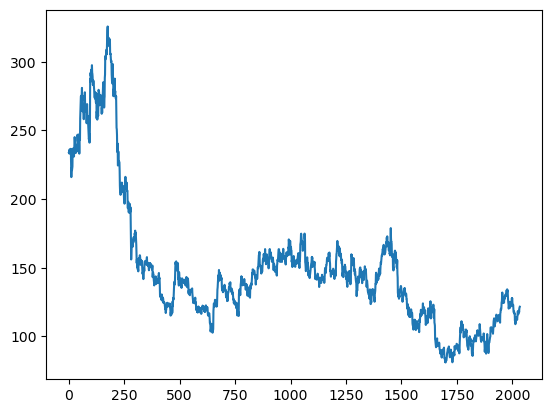

In [6]:
plt.plot(df1)

In [7]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [9]:
training_size,test_size

(1322, 713)

In [10]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.25347222],
       [0.26041667],
       [0.2563317 ]])

In [15]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), np.array(dataY)

In [16]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(1, 100)
(1,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(1, 100)
(1,)


(None, None)

In [19]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\prane\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm (LSTM)                        │ (None, 100, 50)               │      10,400 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_1 (LSTM)                      │ (None, 100, 50)               │      20,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_2 (LSTM)                      │ (None, 50)                    │      20,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 1)                     │          51 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm (LSTM)                        │ (None, 100, 50)               │      10,400 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_1 (LSTM)                      │ (None, 100, 50)               │      20,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_2 (LSTM)                      │ (None, 50)                    │      20,200 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 1)                     │          51 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.8779 - val_loss: 0.0958
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.7311 - val_loss: 0.0711
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.6047 - val_loss: 0.0490
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.4828 - val_loss: 0.0288
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.3584 - val_loss: 0.0114
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.2304 - val_loss: 7.4327e-04
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.1068 - val_loss: 0.0059
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0156 - val_loss: 0.0441
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0173 - val_loss: 0.1033
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.1060 - val_loss: 0.1175
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1172 - val_loss: 0.0954
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0701

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 1.1254e-04 - val_loss: 0.0616
Epoch 69/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 1.7079e-04 - val_loss: 0.0619
Epoch 70/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 1.9211e-04 - val_loss: 0.0617
Epoch 71/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 1.7000e-04 - val_loss: 0.0610
Epoch 72/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 1.1750e-04 - val_loss: 0.0599
Epoch 73/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 5.8384e-05 - val_loss: 0.0587
Epoch 74/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 1.5202e-05 - val_loss: 0.0575
Epoch 75/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 7.4182e-09 - val_loss: 0.0565
Epoch 76/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 1.1323e-05 - val_loss: 0.0556
Epoch 77/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 3.7288e-05 - val_loss: 0.0551
Epoch 78/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 6.2433e-05 - val_loss: 0.0548
Epoch 79/100
1/1 ━━━━━━━━━

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.15.0'

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [29]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

293.1760914123136

In [31]:
math.sqrt(mean_squared_error(ytest,test_predict))

218.34608030630872

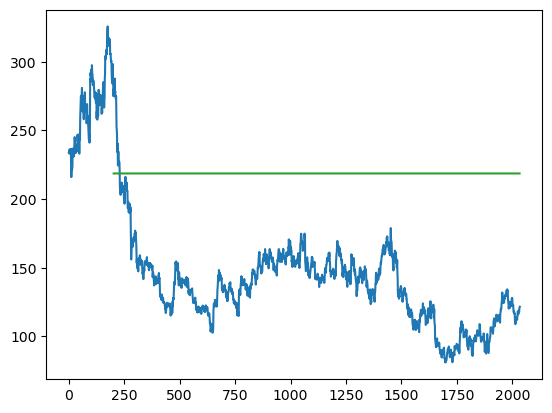

In [32]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

713

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.048815359477124176,
 0.048815359477124176,
 0.05310457516339867,
 0.049632352941176405,
 0.05065359477124176,
 0.05126633986928103,
 0.049632352941176405,
 0.05902777777777779,
 0.055555555555555525,
 0.040849673202614345,
 0.037377450980392135,
 0.037377450980392135,
 0.026552287581699308,
 0.02879901960784309,
 0.03165849673202614,
 0.03165849673202614,
 0.036356209150326724,
 0.022058823529411742,
 0.016748366013071836,
 0.014501633986928053,
 0.022263071895424813,
 0.03615196078431371,
 0.02675653594771238,
 0.03206699346405223,
 0.02696078431372545,
 0.035743464052287566,
 0.03594771241830064,
 0.0404411764705882,
 0.039215686274509776,
 0.044117647058823484,
 0.029820261437908446,
 0.012254901960784326,
 0.012867647058823484,
 0.011437908496731986,
 0.0024509803921567985,
 0.005923202614379064,
 0.0,
 0.007148692810457491,
 0.0042892156862744946,
 0.006740196078431349,
 0.006331699346405206,
 0.011233660130718914,
 0.019607843137254888,
 0.02757352941176472,
 0.030024509803921

In [39]:
from numpy import array

lst_output=[]
n_steps=371
i=0
while(i<30):
    
    if(len(temp_input)>100):
        print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.048815359477124176, 0.048815359477124176, 0.05310457516339867, 0.049632352941176405, 0.05065359477124176, 0.05126633986928103, 0.049632352941176405, 0.05902777777777779, 0.055555555555555525, 0.040849673202614345, 0.037377450980392135, 0.037377450980392135, 0.026552287581699308, 0.02879901960784309, 0.03165849673202614, 0.03165849673202614, 0.036356209150326724, 0.022058823529411742, 0.016748366013071836, 0.014501633986928053, 0.022263071895424813, 0.03615196078431371, 0.02675653594771238, 0.03206699346405223, 0.02696078431372545, 0.035743464052287566, 0.03594771241830064, 0.0404411764705882, 0.039215686274509776, 0.044117647058823484, 0.029820261437908446, 0.012254901960784326, 0.012867647058823484, 0.011437908496731986, 0.0024509803921567985, 0.005923202614379064, 0.0, 0.007148692810457491, 0.0042892156862744946, 0.006740196078431349, 0.006331699346405206, 0.011233660130718914, 0.019607843137254888, 0.02757352941176472, 0.030024509803921517, 0.03349673202614378, 0.0400326797385620

0 day output [[0.4159975]]
[0.048815359477124176, 0.05310457516339867, 0.049632352941176405, 0.05065359477124176, 0.05126633986928103, 0.049632352941176405, 0.05902777777777779, 0.055555555555555525, 0.040849673202614345, 0.037377450980392135, 0.037377450980392135, 0.026552287581699308, 0.02879901960784309, 0.03165849673202614, 0.03165849673202614, 0.036356209150326724, 0.022058823529411742, 0.016748366013071836, 0.014501633986928053, 0.022263071895424813, 0.03615196078431371, 0.02675653594771238, 0.03206699346405223, 0.02696078431372545, 0.035743464052287566, 0.03594771241830064, 0.0404411764705882, 0.039215686274509776, 0.044117647058823484, 0.029820261437908446, 0.012254901960784326, 0.012867647058823484, 0.011437908496731986, 0.0024509803921567985, 0.005923202614379064, 0.0, 0.007148692810457491, 0.0042892156862744946, 0.006740196078431349, 0.006331699346405206, 0.011233660130718914, 0.019607843137254888, 0.02757352941176472, 0.030024509803921517, 0.03349673202614378, 0.04003267973

2 day output [[0.42262352]]
[0.049632352941176405, 0.05065359477124176, 0.05126633986928103, 0.049632352941176405, 0.05902777777777779, 0.055555555555555525, 0.040849673202614345, 0.037377450980392135, 0.037377450980392135, 0.026552287581699308, 0.02879901960784309, 0.03165849673202614, 0.03165849673202614, 0.036356209150326724, 0.022058823529411742, 0.016748366013071836, 0.014501633986928053, 0.022263071895424813, 0.03615196078431371, 0.02675653594771238, 0.03206699346405223, 0.02696078431372545, 0.035743464052287566, 0.03594771241830064, 0.0404411764705882, 0.039215686274509776, 0.044117647058823484, 0.029820261437908446, 0.012254901960784326, 0.012867647058823484, 0.011437908496731986, 0.0024509803921567985, 0.005923202614379064, 0.0, 0.007148692810457491, 0.0042892156862744946, 0.006740196078431349, 0.006331699346405206, 0.011233660130718914, 0.019607843137254888, 0.02757352941176472, 0.030024509803921517, 0.03349673202614378, 0.04003267973856206, 0.040849673202614345, 0.0398284313

5 day output [[0.44953758]]
[0.049632352941176405, 0.05902777777777779, 0.055555555555555525, 0.040849673202614345, 0.037377450980392135, 0.037377450980392135, 0.026552287581699308, 0.02879901960784309, 0.03165849673202614, 0.03165849673202614, 0.036356209150326724, 0.022058823529411742, 0.016748366013071836, 0.014501633986928053, 0.022263071895424813, 0.03615196078431371, 0.02675653594771238, 0.03206699346405223, 0.02696078431372545, 0.035743464052287566, 0.03594771241830064, 0.0404411764705882, 0.039215686274509776, 0.044117647058823484, 0.029820261437908446, 0.012254901960784326, 0.012867647058823484, 0.011437908496731986, 0.0024509803921567985, 0.005923202614379064, 0.0, 0.007148692810457491, 0.0042892156862744946, 0.006740196078431349, 0.006331699346405206, 0.011233660130718914, 0.019607843137254888, 0.02757352941176472, 0.030024509803921517, 0.03349673202614378, 0.04003267973856206, 0.040849673202614345, 0.03982843137254899, 0.041666666666666685, 0.0437091503267974, 0.04758986928

8 day output [[0.49322388]]
[0.040849673202614345, 0.037377450980392135, 0.037377450980392135, 0.026552287581699308, 0.02879901960784309, 0.03165849673202614, 0.03165849673202614, 0.036356209150326724, 0.022058823529411742, 0.016748366013071836, 0.014501633986928053, 0.022263071895424813, 0.03615196078431371, 0.02675653594771238, 0.03206699346405223, 0.02696078431372545, 0.035743464052287566, 0.03594771241830064, 0.0404411764705882, 0.039215686274509776, 0.044117647058823484, 0.029820261437908446, 0.012254901960784326, 0.012867647058823484, 0.011437908496731986, 0.0024509803921567985, 0.005923202614379064, 0.0, 0.007148692810457491, 0.0042892156862744946, 0.006740196078431349, 0.006331699346405206, 0.011233660130718914, 0.019607843137254888, 0.02757352941176472, 0.030024509803921517, 0.03349673202614378, 0.04003267973856206, 0.040849673202614345, 0.03982843137254899, 0.041666666666666685, 0.0437091503267974, 0.047589869281045694, 0.03594771241830064, 0.028390522875817004, 0.02410130718

10 day output [[0.52713835]]
[0.037377450980392135, 0.026552287581699308, 0.02879901960784309, 0.03165849673202614, 0.03165849673202614, 0.036356209150326724, 0.022058823529411742, 0.016748366013071836, 0.014501633986928053, 0.022263071895424813, 0.03615196078431371, 0.02675653594771238, 0.03206699346405223, 0.02696078431372545, 0.035743464052287566, 0.03594771241830064, 0.0404411764705882, 0.039215686274509776, 0.044117647058823484, 0.029820261437908446, 0.012254901960784326, 0.012867647058823484, 0.011437908496731986, 0.0024509803921567985, 0.005923202614379064, 0.0, 0.007148692810457491, 0.0042892156862744946, 0.006740196078431349, 0.006331699346405206, 0.011233660130718914, 0.019607843137254888, 0.02757352941176472, 0.030024509803921517, 0.03349673202614378, 0.04003267973856206, 0.040849673202614345, 0.03982843137254899, 0.041666666666666685, 0.0437091503267974, 0.047589869281045694, 0.03594771241830064, 0.028390522875817004, 0.024101307189542454, 0.017156862745098034, 0.0153186274

13 day output [[0.5796369]]
[0.03165849673202614, 0.03165849673202614, 0.036356209150326724, 0.022058823529411742, 0.016748366013071836, 0.014501633986928053, 0.022263071895424813, 0.03615196078431371, 0.02675653594771238, 0.03206699346405223, 0.02696078431372545, 0.035743464052287566, 0.03594771241830064, 0.0404411764705882, 0.039215686274509776, 0.044117647058823484, 0.029820261437908446, 0.012254901960784326, 0.012867647058823484, 0.011437908496731986, 0.0024509803921567985, 0.005923202614379064, 0.0, 0.007148692810457491, 0.0042892156862744946, 0.006740196078431349, 0.006331699346405206, 0.011233660130718914, 0.019607843137254888, 0.02757352941176472, 0.030024509803921517, 0.03349673202614378, 0.04003267973856206, 0.040849673202614345, 0.03982843137254899, 0.041666666666666685, 0.0437091503267974, 0.047589869281045694, 0.03594771241830064, 0.028390522875817004, 0.024101307189542454, 0.017156862745098034, 0.015318627450980393, 0.017565359477124176, 0.02696078431372545, 0.02696078431

16 day output [[0.6304304]]
[0.022058823529411742, 0.016748366013071836, 0.014501633986928053, 0.022263071895424813, 0.03615196078431371, 0.02675653594771238, 0.03206699346405223, 0.02696078431372545, 0.035743464052287566, 0.03594771241830064, 0.0404411764705882, 0.039215686274509776, 0.044117647058823484, 0.029820261437908446, 0.012254901960784326, 0.012867647058823484, 0.011437908496731986, 0.0024509803921567985, 0.005923202614379064, 0.0, 0.007148692810457491, 0.0042892156862744946, 0.006740196078431349, 0.006331699346405206, 0.011233660130718914, 0.019607843137254888, 0.02757352941176472, 0.030024509803921517, 0.03349673202614378, 0.04003267973856206, 0.040849673202614345, 0.03982843137254899, 0.041666666666666685, 0.0437091503267974, 0.047589869281045694, 0.03594771241830064, 0.028390522875817004, 0.024101307189542454, 0.017156862745098034, 0.015318627450980393, 0.017565359477124176, 0.02696078431372545, 0.02696078431372545, 0.03819444444444442, 0.028390522875817004, 0.02369281045

18 day output [[0.6624319]]
[0.014501633986928053, 0.022263071895424813, 0.03615196078431371, 0.02675653594771238, 0.03206699346405223, 0.02696078431372545, 0.035743464052287566, 0.03594771241830064, 0.0404411764705882, 0.039215686274509776, 0.044117647058823484, 0.029820261437908446, 0.012254901960784326, 0.012867647058823484, 0.011437908496731986, 0.0024509803921567985, 0.005923202614379064, 0.0, 0.007148692810457491, 0.0042892156862744946, 0.006740196078431349, 0.006331699346405206, 0.011233660130718914, 0.019607843137254888, 0.02757352941176472, 0.030024509803921517, 0.03349673202614378, 0.04003267973856206, 0.040849673202614345, 0.03982843137254899, 0.041666666666666685, 0.0437091503267974, 0.047589869281045694, 0.03594771241830064, 0.028390522875817004, 0.024101307189542454, 0.017156862745098034, 0.015318627450980393, 0.017565359477124176, 0.02696078431372545, 0.02696078431372545, 0.03819444444444442, 0.028390522875817004, 0.02369281045751631, 0.029207516339869233, 0.023284313725

21 day output [[0.70723695]]
[0.02675653594771238, 0.03206699346405223, 0.02696078431372545, 0.035743464052287566, 0.03594771241830064, 0.0404411764705882, 0.039215686274509776, 0.044117647058823484, 0.029820261437908446, 0.012254901960784326, 0.012867647058823484, 0.011437908496731986, 0.0024509803921567985, 0.005923202614379064, 0.0, 0.007148692810457491, 0.0042892156862744946, 0.006740196078431349, 0.006331699346405206, 0.011233660130718914, 0.019607843137254888, 0.02757352941176472, 0.030024509803921517, 0.03349673202614378, 0.04003267973856206, 0.040849673202614345, 0.03982843137254899, 0.041666666666666685, 0.0437091503267974, 0.047589869281045694, 0.03594771241830064, 0.028390522875817004, 0.024101307189542454, 0.017156862745098034, 0.015318627450980393, 0.017565359477124176, 0.02696078431372545, 0.02696078431372545, 0.03819444444444442, 0.028390522875817004, 0.02369281045751631, 0.029207516339869233, 0.02328431372549017, 0.019199346405228745, 0.006535947712418277, 0.00061274509

24 day output [[0.7481459]]
[0.035743464052287566, 0.03594771241830064, 0.0404411764705882, 0.039215686274509776, 0.044117647058823484, 0.029820261437908446, 0.012254901960784326, 0.012867647058823484, 0.011437908496731986, 0.0024509803921567985, 0.005923202614379064, 0.0, 0.007148692810457491, 0.0042892156862744946, 0.006740196078431349, 0.006331699346405206, 0.011233660130718914, 0.019607843137254888, 0.02757352941176472, 0.030024509803921517, 0.03349673202614378, 0.04003267973856206, 0.040849673202614345, 0.03982843137254899, 0.041666666666666685, 0.0437091503267974, 0.047589869281045694, 0.03594771241830064, 0.028390522875817004, 0.024101307189542454, 0.017156862745098034, 0.015318627450980393, 0.017565359477124176, 0.02696078431372545, 0.02696078431372545, 0.03819444444444442, 0.028390522875817004, 0.02369281045751631, 0.029207516339869233, 0.02328431372549017, 0.019199346405228745, 0.006535947712418277, 0.000612745098039158, 0.007965686274509776, 0.012459150326797341, 0.019812091

26 day output [[0.77328455]]
[0.0404411764705882, 0.039215686274509776, 0.044117647058823484, 0.029820261437908446, 0.012254901960784326, 0.012867647058823484, 0.011437908496731986, 0.0024509803921567985, 0.005923202614379064, 0.0, 0.007148692810457491, 0.0042892156862744946, 0.006740196078431349, 0.006331699346405206, 0.011233660130718914, 0.019607843137254888, 0.02757352941176472, 0.030024509803921517, 0.03349673202614378, 0.04003267973856206, 0.040849673202614345, 0.03982843137254899, 0.041666666666666685, 0.0437091503267974, 0.047589869281045694, 0.03594771241830064, 0.028390522875817004, 0.024101307189542454, 0.017156862745098034, 0.015318627450980393, 0.017565359477124176, 0.02696078431372545, 0.02696078431372545, 0.03819444444444442, 0.028390522875817004, 0.02369281045751631, 0.029207516339869233, 0.02328431372549017, 0.019199346405228745, 0.006535947712418277, 0.000612745098039158, 0.007965686274509776, 0.012459150326797341, 0.01981209150326796, 0.019403594771241817, 0.02246732

28 day output [[0.7967513]]
[0.044117647058823484, 0.029820261437908446, 0.012254901960784326, 0.012867647058823484, 0.011437908496731986, 0.0024509803921567985, 0.005923202614379064, 0.0, 0.007148692810457491, 0.0042892156862744946, 0.006740196078431349, 0.006331699346405206, 0.011233660130718914, 0.019607843137254888, 0.02757352941176472, 0.030024509803921517, 0.03349673202614378, 0.04003267973856206, 0.040849673202614345, 0.03982843137254899, 0.041666666666666685, 0.0437091503267974, 0.047589869281045694, 0.03594771241830064, 0.028390522875817004, 0.024101307189542454, 0.017156862745098034, 0.015318627450980393, 0.017565359477124176, 0.02696078431372545, 0.02696078431372545, 0.03819444444444442, 0.028390522875817004, 0.02369281045751631, 0.029207516339869233, 0.02328431372549017, 0.019199346405228745, 0.006535947712418277, 0.000612745098039158, 0.007965686274509776, 0.012459150326797341, 0.01981209150326796, 0.019403594771241817, 0.022467320261437884, 0.031249999999999944, 0.0234885

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
len(df1)

2035

In [42]:
scaler.inverse_transform(lst_output)

array([[182.78618927],
       [183.35204396],
       [184.4082365 ],
       [186.0369957 ],
       [188.247193  ],
       [190.99679842],
       [194.21289964],
       [197.80783992],
       [201.69120479],
       [205.77805147],
       [209.99346867],
       [214.27469225],
       [218.57145548],
       [222.84510622],
       [227.06688519],
       [231.21629171],
       [235.27936201],
       [239.24688902],
       [243.11332808],
       [246.87541075],
       [250.5317071 ],
       [254.08160429],
       [257.52524824],
       [260.86314964],
       [264.09611101],
       [267.22473059],
       [270.25005894],
       [273.17305908],
       [275.99472322],
       [278.71629162]])

In [65]:
# plt.plot(day_new,scaler.inverse_transform(df1[1158:]))

In [56]:
import numpy as np
df1_values = df1[1158:]
df1_values_reshaped = df1_values[:100].reshape(-1) 

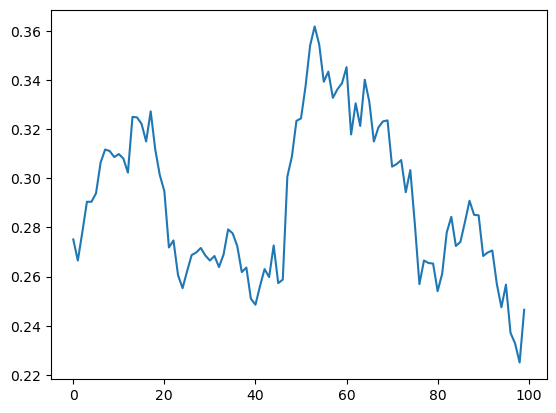

In [66]:
plt.plot(df1_values_reshaped)

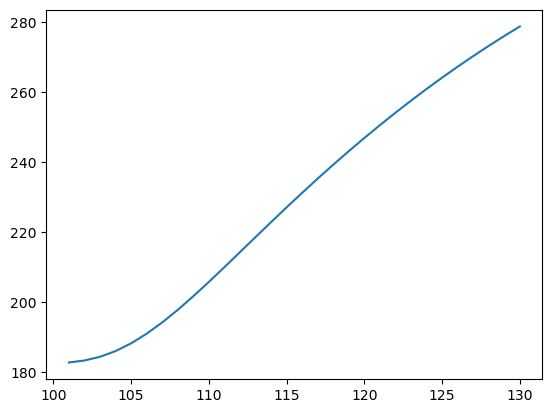

In [58]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

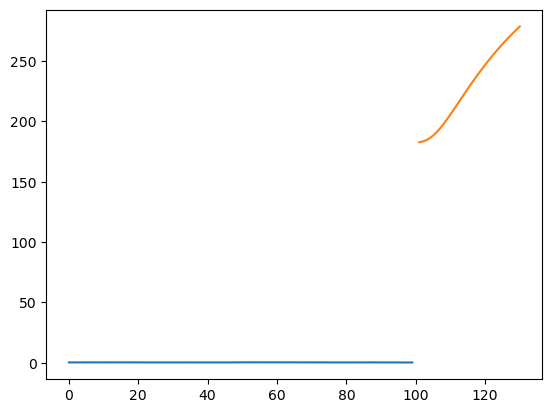

In [64]:
plt.plot(df1_values_reshaped)
plt.plot(day_pred,scaler.inverse_transform(lst_output))

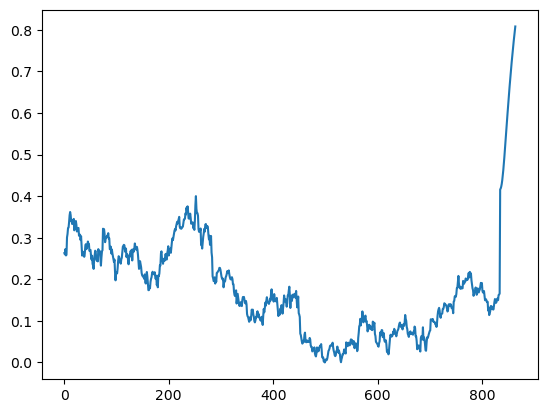

In [59]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [60]:
df3=scaler.inverse_transform(df3).tolist()

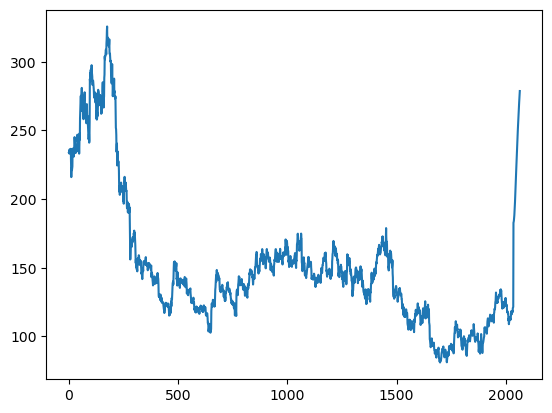

In [61]:
plt.plot(df3)